# <a id='link2'>Background & Context:</a>
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

# <a id='link2'>Objective:</a>     

Build a model that will help the marketing department; 

1. To identify the potential customers who have a higher probability of purchasing the loan.
2. To predict whether a liability customer will buy a personal loan or not.
3. Which variables are most significant.
4. Which segment of customers should be targeted more.

# <a id='link2'>Data Dictionary:</a>
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# <a id='link2'>Loading Libraries</a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model and get different metric scores
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


# <a id='link2'>Loading and exploring the data</a>

In [2]:
data = pd.read_csv("Loan_Modelling.csv", index_col=0)
df = data.copy() # Making a copy of the data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# Setting the random seed to look at 10 random rows
np.random.seed(1)
df.sample(n=10)

There are 5000 rows and 13 columns.


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1


* The dataset has 5000 rows and 13 columns.

In [3]:
df.info() # Checking the dataset info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


* The data set has no missing values. However, column such as Experience has negative values, which is not realistic, so the negative values will be converted to nan and treated as missing values.

In [4]:
from uszipcode import SearchEngine # To convert zipcode to city
search = SearchEngine(simple_zipcode=False)

# Creating a new column to give information about the city names.
def zcode(x):
    return search.by_zipcode(x).major_city
df['City'] = df['ZIPCode'].apply(zcode)

In [5]:
# Converting negative values in Experience column to nan and treat them as missing values.

df.loc[~(df['Experience'] >= 0), 'Experience']=np.nan

### Statistical summary for the dataset.

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000,NaN,NaN,NaN,45.3384,11.4632,23,35,45,55,67
Experience,4948,NaN,NaN,NaN,20.331,11.312,0,10.75,20,30,43
Income,5000,NaN,NaN,NaN,73.7742,46.0337,8,39,64,98,224
ZIPCode,5000,NaN,NaN,NaN,93169.3,1759.46,90005,91911,93437,94608,96651
Family,5000,NaN,NaN,NaN,2.3964,1.14766,1,1,2,3,4
CCAvg,5000,NaN,NaN,NaN,1.93794,1.74766,0,0.7,1.5,2.5,10
Education,5000,NaN,NaN,NaN,1.881,0.839869,1,1,2,3,3
Mortgage,5000,NaN,NaN,NaN,56.4988,101.714,0,0,0,101,635
Personal_Loan,5000,NaN,NaN,NaN,0.096,0.294621,0,0,0,0,1
Securities_Account,5000,NaN,NaN,NaN,0.1044,0.305809,0,0,0,0,1


## Insights:

- The *City* column has 244 unique values, and Los Angeles is the city with th most frequency.
- The maximum age, experience and Income of customers are 67, 43 and 224 respectively.
- Age and Experience both have approximately same mean and median.
- Mean is greater than the median for Income and CCAvg variable which suggests that these variables are right skewed.

### Missing Value Treatment

In [7]:
df.isnull().sum().sort_values(ascending=False)

Experience            52
City                  34
CreditCard             0
Online                 0
CD_Account             0
Securities_Account     0
Personal_Loan          0
Mortgage               0
Education              0
CCAvg                  0
Family                 0
ZIPCode                0
Income                 0
Age                    0
dtype: int64

* Column Experience and City both have missing values after processing the data to remove negative values from experience and convert zipcode to city.

#### Experience

In [8]:
# We'll impute missing values by taking mode number of experience for the particular Income and Education group,

df["Experience"] = df.groupby(["Income", "Education"])["Experience"].transform(lambda x: x.fillna(x.mode()[0]))

#### City

In [9]:
df[df["City"].isnull()]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
ID,,,,,,,,,,,,,,
107,43,17.0,69,92717,4,2.90,1,0,0,0,0,1,1,None
173,38,13.0,171,92717,2,7.80,1,0,0,0,0,1,0,None
185,52,26.0,63,92717,2,1.50,2,0,0,1,0,1,0,None
322,44,20.0,101,92717,3,4.40,2,82,1,0,0,0,0,None
367,50,24.0,35,92717,1,0.30,3,0,0,0,0,1,0,None
385,51,25.0,21,93077,4,0.60,3,0,0,0,0,1,1,None
469,34,10.0,21,92634,1,0.50,3,0,0,0,0,1,0,None
477,60,34.0,53,92717,1,0.80,2,0,0,1,0,0,1,None
631,32,7.0,35,96651,3,1.30,1,108,0,0,0,0,1,None


In [10]:
df["City"] = df["City"].fillna('Unknown') # filling missing values as unkown.

In [11]:
df.isnull().sum().sort_values(ascending=False)

City                  0
CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
dtype: int64

# <a id='link2'>Exploratory Data Analysis</a>

In [12]:
# Writing a function to help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize, 
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

**Exploring the *Age* variable**

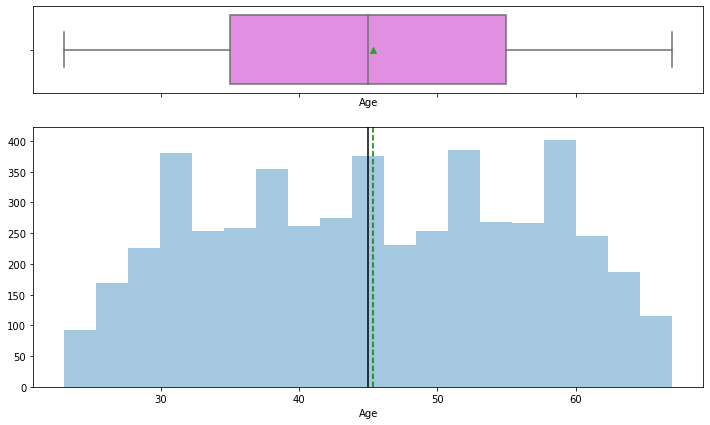

In [13]:
histogram_boxplot(df["Age"])

* The distribution has no outliers.
* The age median is 45 and the mean is very close to the median value.

**Exploring the *Experience* variable**

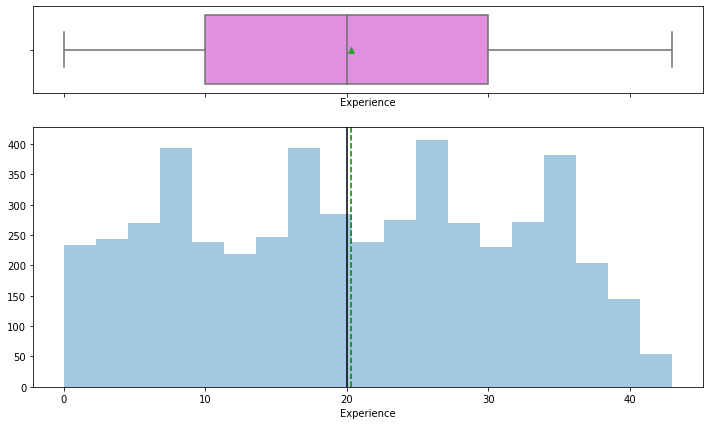

In [14]:
histogram_boxplot(df["Experience"])

* The distribution has no outliers.
* The mean and median value are relatively close values.

**Exploring the *Income* variable**

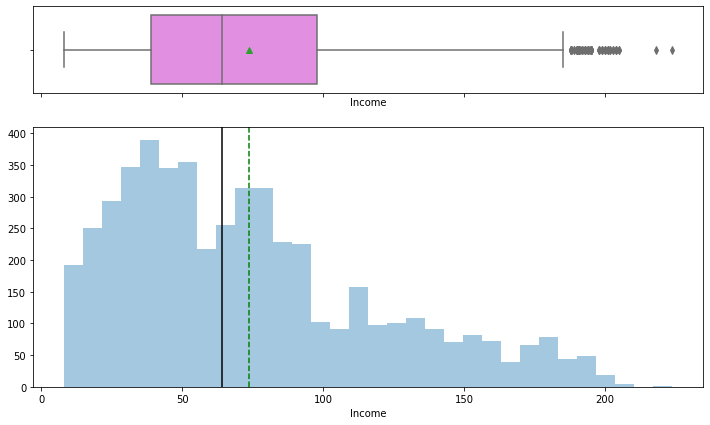

In [15]:
histogram_boxplot(df["Income"])

* The distribution is right skewed. 
* It has many outliers towards the higher end which implies that fewer customers earn very high income, with some of the customers earning above 200.

**Exploring the *CCAvg* variable**

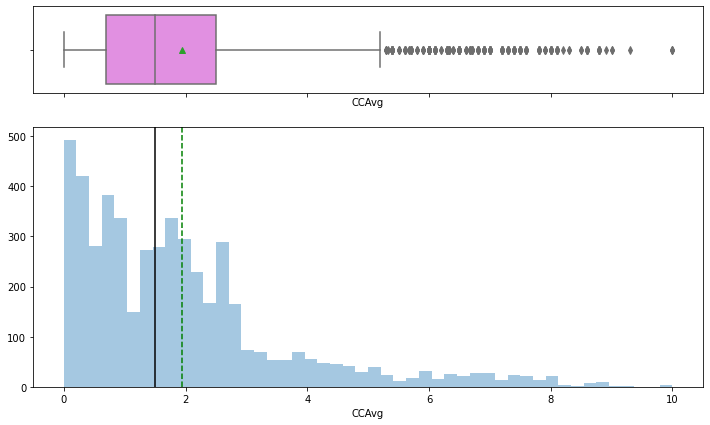

In [16]:
histogram_boxplot(df["CCAvg"])

* The distribution is right skewed.
* It has many outliers towards the higher end

**Exploring the *Mortgage* variable**

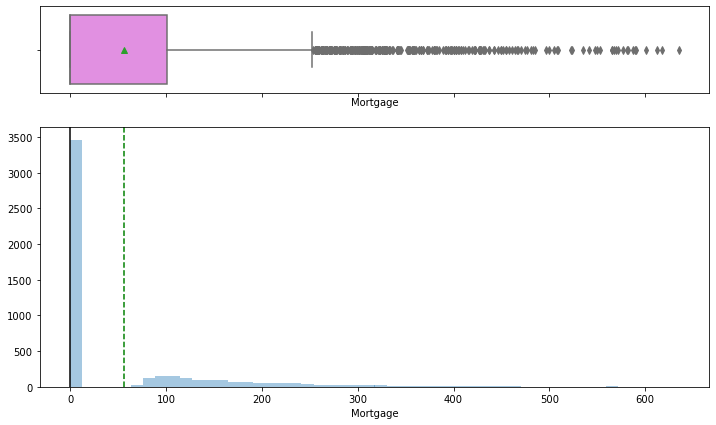

In [17]:
histogram_boxplot(df["Mortgage"])

* The distribution is right skewed.
* There are outliers present towards the higher end of the data implying that most customers don't have mortgage.

In [18]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

**City**

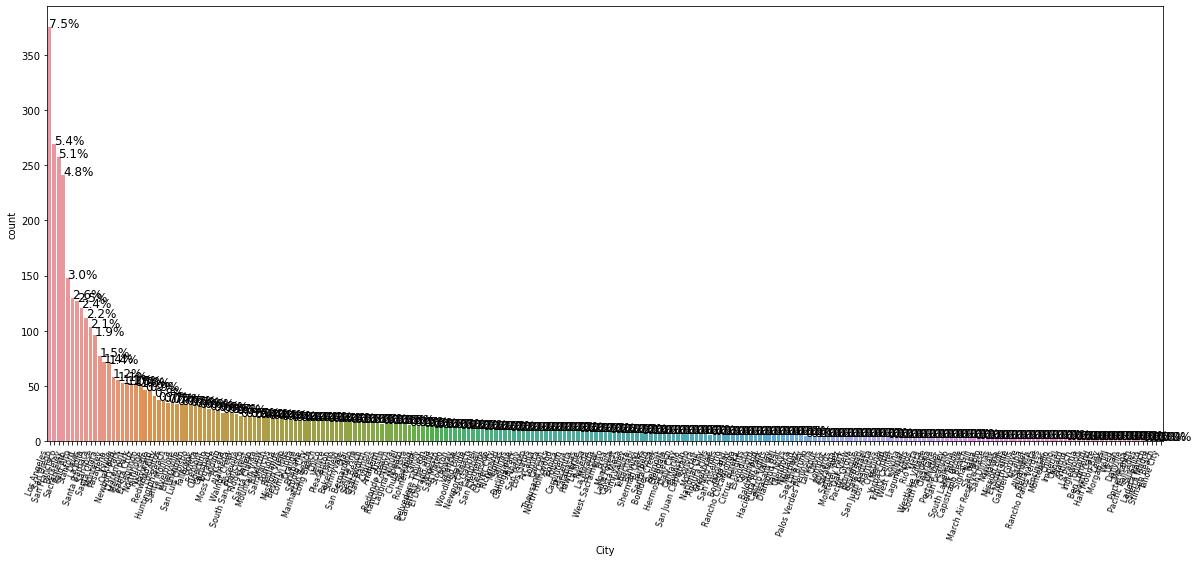

In [19]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df["City"],order = df["City"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=70, ha="right")
perc_on_bar(ax, df["City"])

* Los Angeles have exceptionally high counts of customers compared to the other Cities.

**Family**

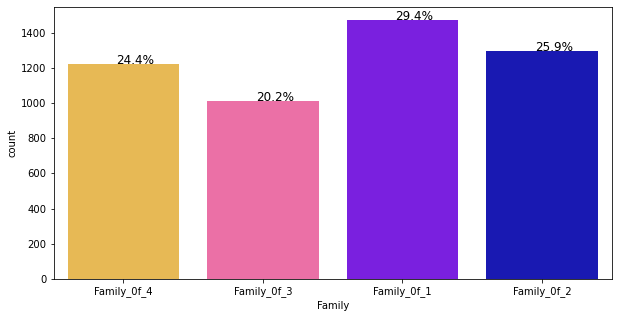

In [20]:
#Converting family back to category
df['Family'].replace(1,'Family_0f_1',inplace=True)
df['Family'].replace(2,'Family_0f_2',inplace=True)
df['Family'].replace(3,'Family_0f_3',inplace=True)
df['Family'].replace(4,'Family_0f_4',inplace=True)

plt.figure(figsize=(10,5))
ax = sns.countplot(df["Family"],palette='gnuplot2_r')
perc_on_bar(ax,df["Family"])

* The proportion of family of 1 is higher than other family group with family of 3 running the lowest.

**Education**

In [21]:
#Converting education back to category
df['Education'].replace(1,'Undergrad',inplace=True)
df['Education'].replace(2,'Graduate',inplace=True)
df['Education'].replace(3,'Advanced_Professional',inplace=True)

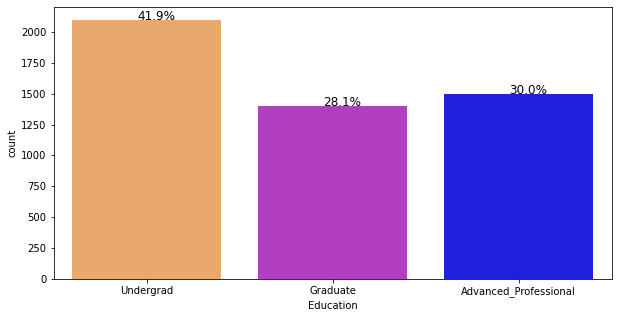

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Education"],palette='gnuplot2_r')
perc_on_bar(ax,df["Education"])

- Majority of the customers i.e., 41.9% fall into the undergrad category.
- 30% customers lie in Advanced_Professional category and 28.1% customers fall into the graduate category.

**Personal Loan**

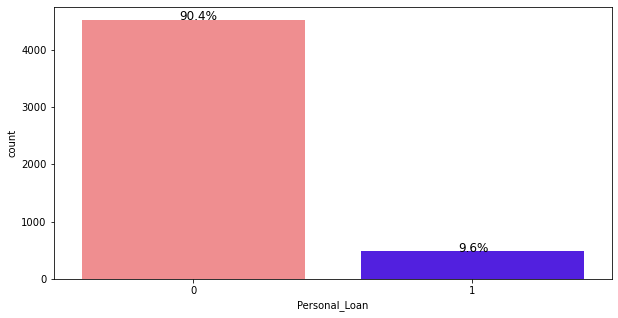

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Personal_Loan"],palette='gnuplot2_r')
perc_on_bar(ax,df["Personal_Loan"])

* 9.6% of the customers accepted the personal loan offered in the last campaign, which is a huge margin from the customers that did not accept the personal loan offered.

**Securities Account**

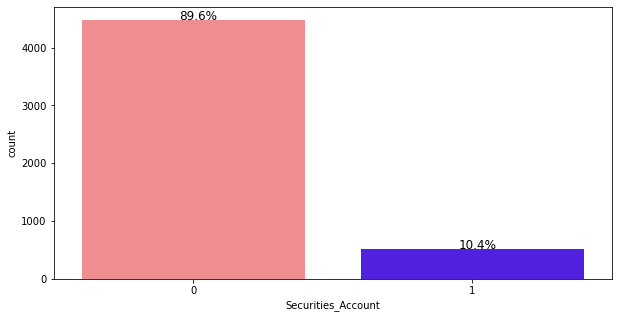

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Securities_Account"],palette='gnuplot2_r')
perc_on_bar(ax,df["Securities_Account"])

* Most than 75% of the customers don't have securities account with the bank.

**CD Account**

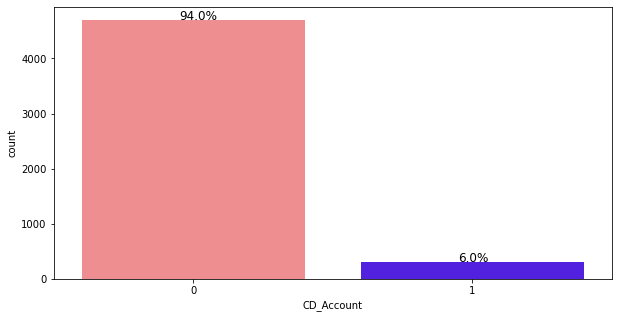

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["CD_Account"],palette='gnuplot2_r')
perc_on_bar(ax,df["CD_Account"])

* The proportion of customers with certificate of deposit (CD) account with the bank is 6% which is relatively low to the customers without a CD account

**Online**

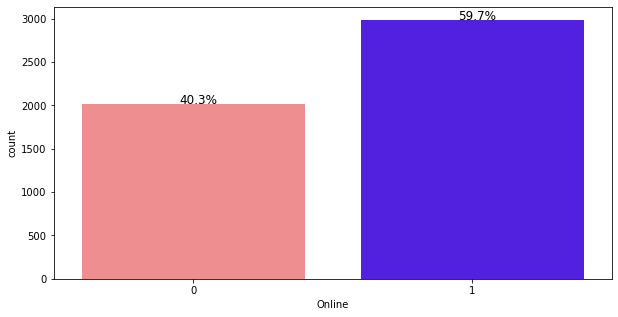

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Online"],palette='gnuplot2_r')
perc_on_bar(ax,df["Online"])

* Approximately 60% of the customer use a credit card issued by any other Bank (excluding All life Bank).

**CreditCard**

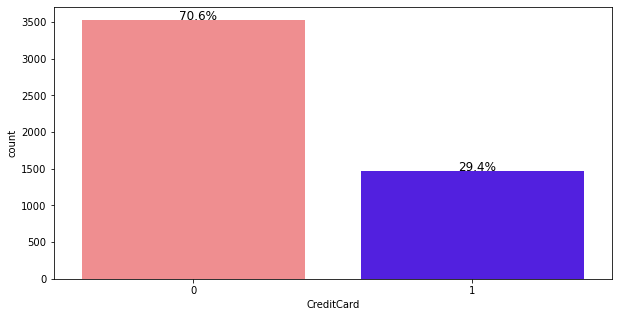

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["CreditCard"],palette='gnuplot2_r')
perc_on_bar(ax,df["CreditCard"])

* Few of the customers use internet banking facilities.

## Bivariate analysis

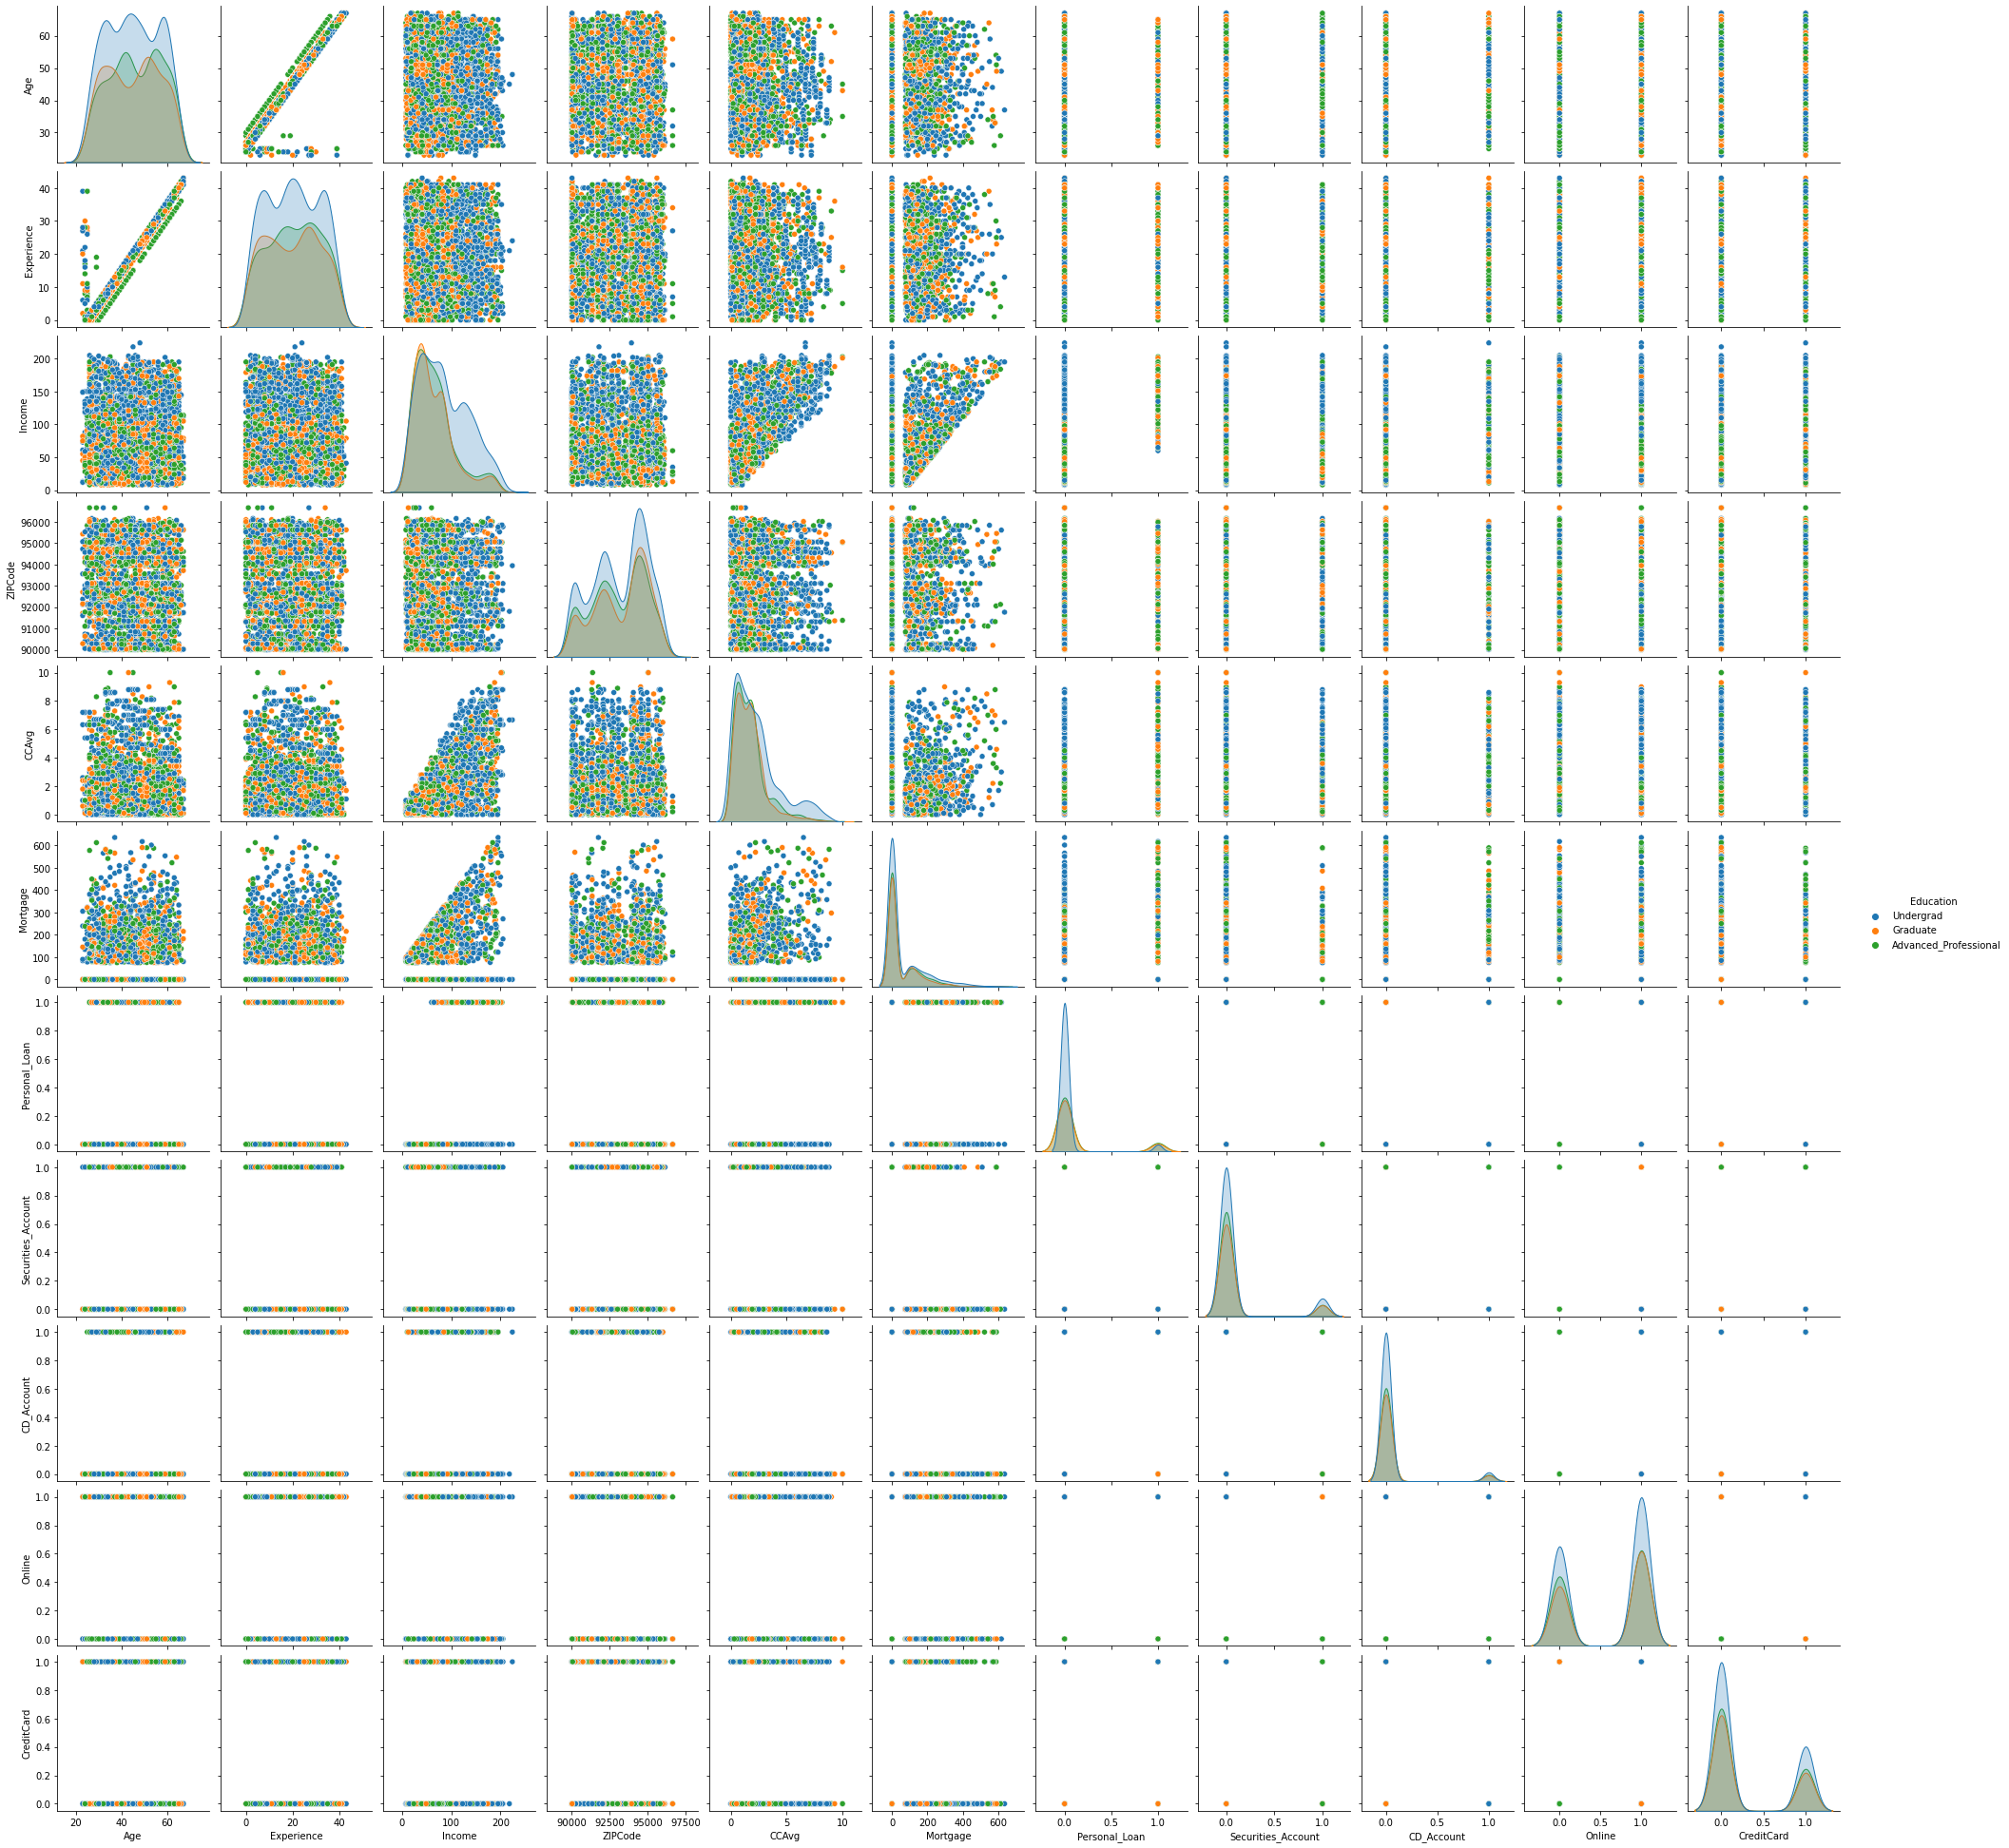

In [28]:
sns.pairplot(data=df, hue="Education")
plt.show()

* We can see varying distributions in variables for different education level, we should investigate it further.
* Age and experience looks to be highly correlated.

#### Correlation among pairs

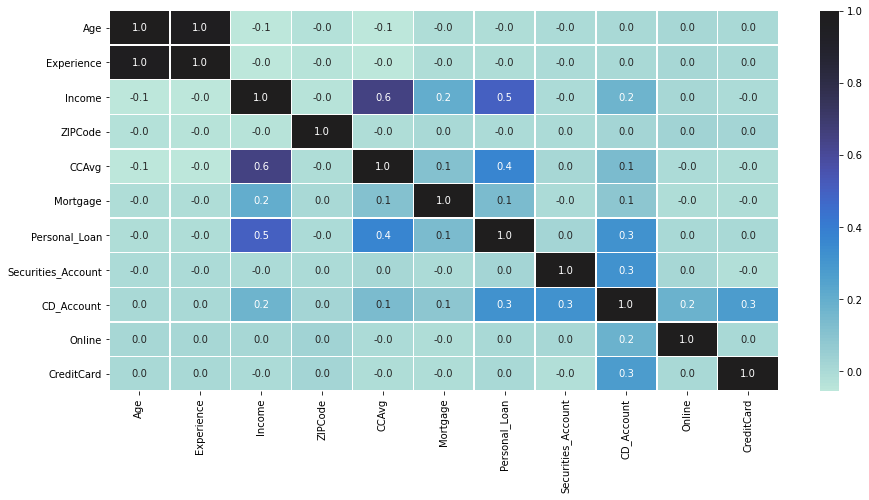

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1)
plt.show()

* Age is highly correlated with experience, indicating the older customers posses higher experience.
* Personal_Loan is mid-correlated with Income.

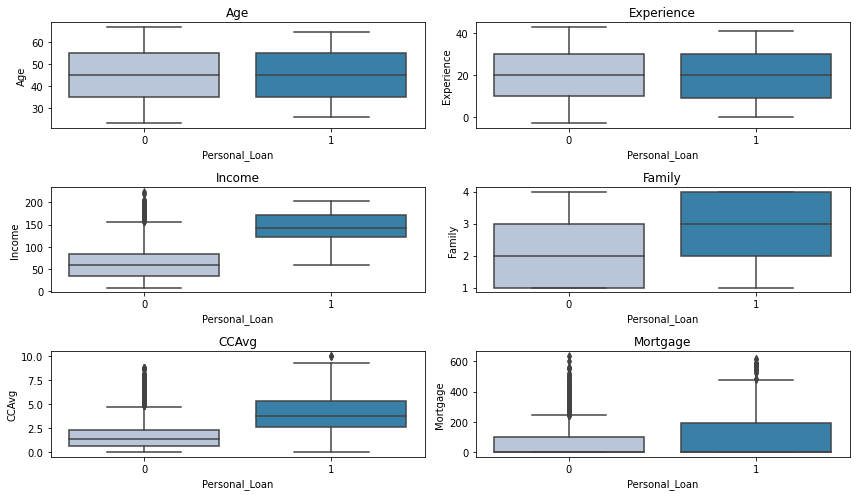

In [30]:
cols = df[['Age','Experience','Income','Family','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Customers that accepted the personal loan earn high income and have high CCAvg.

#### City vs Income

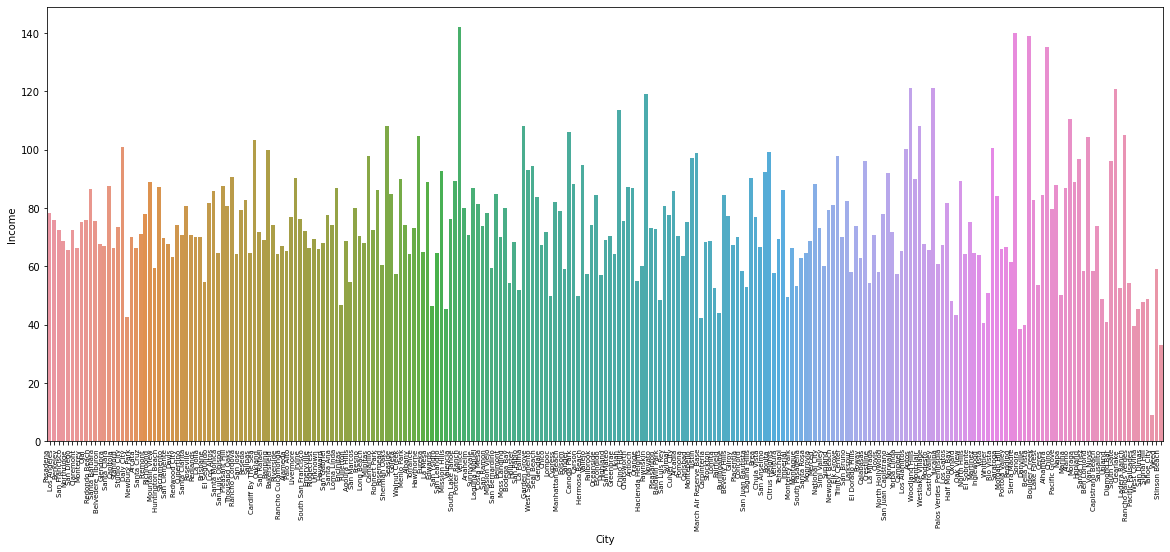

In [31]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x="City", y="Income", data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=90, ha="right")
plt.show()

* Venice, Sonora, Boulder Creek cnd Chino have customers with higher income compared to other cities with Venice ranking as the city with the highest earning customer.

#### Personal Loan vs Education

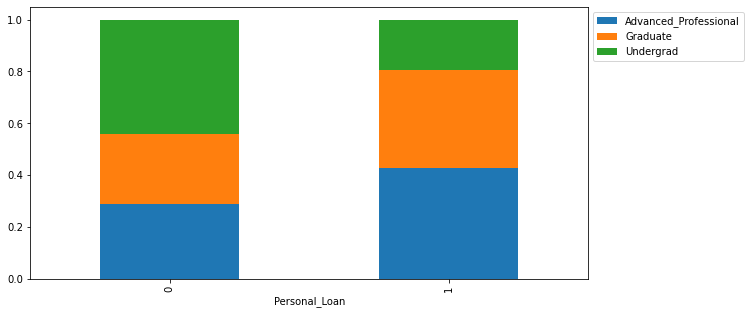

In [32]:
tab = pd.crosstab(df['Personal_Loan'],df['Education'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(10,5))
#plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

* Customers with Advanced/Professional education accepted more personal loans compared to the other education levels.
* Customers that declined personal loans are mostly customers with undergrad education.

# <a id='link3'>Data Preparation for Modeling</a>

In [33]:
North_Cali = [
    'Alameda','Antioch','Berkeley','Brentwood','Chico','Citrus Heights','Clovis','Concord','Cupertino','Daly City',
'Davis','Elk Grove','Fairfield','Folsom','Fresno','Fremont','Hanford','Hayward','Livermore','Lodi','Madera',
'Manteca','Merced','Milpitas','Modesto','Mountain View','Napa','Novato','Oakland','Palo Alto','Petaluma','Pittsburg',
'Pleasanton','Porterville','Rancho Cordova','Redding','Redwood City','Richmond','Rocklin','Roseville','Sacramento',
'Salinas','San Francisco','San Jose','San Leandro','San Mateo','San Rafael','San Ramon','Santa Clara','Santa Cruz',
'Santa Rosa','South San Francisco','Stockton','Sunnyvale','Tracy','Tulare','Turlock','Union City','Vacaville',
'Vallejo','Visalia','Walnut Creek','Watsonville','Woodland','Yuba City']

In [34]:
#Dividing the cities into two regions northern and southern california

df['Region'] = df['City'].replace([North_Cali], 'Northern_California')
df['Region'] = df['Region'].replace([df[df['Region']!= 'Northern_California']], 'Southern_California')

In [35]:
df['Region'].value_counts()

Southern_California    3233
Northern_California    1767
Name: Region, dtype: int64

In [36]:
df.drop(['ZIPCode', 'City'],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Region
ID,,,,,,,,,,,,,
1,25,1.0,49,Family_0f_4,1.6,Undergrad,0,0,1,0,0,0,Southern_California
2,45,19.0,34,Family_0f_3,1.5,Undergrad,0,0,1,0,0,0,Southern_California
3,39,15.0,11,Family_0f_1,1.0,Undergrad,0,0,0,0,0,0,Northern_California
4,35,9.0,100,Family_0f_1,2.7,Graduate,0,0,0,0,0,0,Northern_California
5,35,8.0,45,Family_0f_4,1.0,Graduate,0,0,0,0,0,1,Southern_California


In [37]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = df.drop([*kwargs], axis=1)
    Y = df['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [38]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

In [39]:
X_train.head()

,const,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_Family_0f_2,Family_Family_0f_3,Family_Family_0f_4,Education_Graduate,Education_Undergrad,Region_Southern_California
ID,,,,,,,,,,,,,,,,
1335,1.0,47,22.0,35,1.3,0,0,0,1,0,1,0,0,0,1,0
4769,1.0,38,14.0,39,2.0,0,0,0,1,0,0,0,0,1,0,1
66,1.0,59,35.0,131,3.8,0,0,0,1,1,0,0,0,0,1,1
178,1.0,29,3.0,65,1.8,244,0,0,0,0,0,0,1,1,0,0
4490,1.0,39,13.0,21,0.2,0,0,0,1,0,0,1,0,1,0,1


In [40]:
print('Shape of training set:', X_train.shape)
print('Shape of test set:', X_test.shape)

Shape of training set: (3500, 16)
Shape of test set: (1500, 16)


In [41]:
def get_metrics_score(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    
        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)
        
        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)


        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [42]:
def make_confusion_matrix(model,library,test_X,y_actual,threshold=0.5,labels=[0, 1]):
    '''
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    
    '''
    
    if library == 'sklearn':
        y_predict = model.predict(test_X)
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0,1])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                      columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    elif library =='stats':
        y_predict = model.predict(test_X)>threshold
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                      columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

## Logistic Regression

Accuracy on training set :  0.9608571428571429
Accuracy on test set :  0.9513333333333334
Recall on training set :  0.6646525679758308
Recall on test set :  0.5771812080536913
Precision on training set :  0.8943089430894309
Precision on test set :  0.8958333333333334
F1 on training set :  0.7625649913344886
F1 on test set :  0.7020408163265307


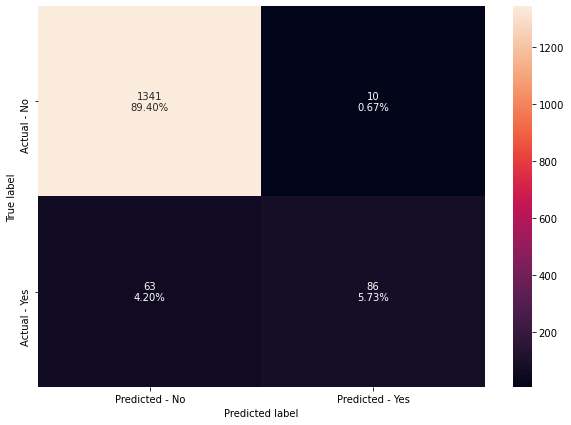

In [43]:
# Sklearn library
# Utilizing the newton-cg solver because it is faster for high-dimensional data

lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# confusion matrix

make_confusion_matrix(lr,'sklearn',X_test,y_test)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,'sklearn',X_train,X_test,y_train,y_test)

* The logistic regression model shows good performance on the train and test sets, but will have to build a logistic regression model using the statsmodels library to identify significant variables.

In [44]:
# statsmodels library

logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

# Let's check model performances for this model
scores_LR = get_metrics_score(lg,'stats',X_train,X_test,y_train,y_test)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.107146
         Iterations 10
Accuracy on training set :  0.9634285714285714
Accuracy on test set :  0.958
Recall on training set :  0.7009063444108762
Recall on test set :  0.6442953020134228
Precision on training set :  0.8888888888888888
Precision on test set :  0.9056603773584906
F1 on training set :  0.7837837837837839
F1 on test set :  0.7529411764705881
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6577
Time:                        21:31:33   Log-Likelihood:                -375.01
converged:                       True   LL-Null:                       -1095.5
Covariance 


- Considering the significance level to be 0.05, any variable with a p-value less than 0.05 is significant.

### Multicollinearity

In [45]:
X_train_num = X_train.astype(float).copy()
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                         126.061209
Age                            21.869563
Experience                     21.830014
Income                          1.887954
CCAvg                           1.736005
Mortgage                        1.047512
Securities_Account              1.147442
CD_Account                      1.363110
Online                          1.041120
CreditCard                      1.111194
Family_Family_0f_2              1.406142
Family_Family_0f_3              1.380859
Family_Family_0f_4              1.427810
Education_Graduate              1.421424
Education_Undergrad             1.465241
Region_Southern_California      1.006698
dtype: float64



* There is an high multicollinearity in Age and Experience and the two variables are correlated with each other.
* We will drop Experience as we get thesame information from Age

In [46]:
# Droping Experience

X_train_num1 = X_train_num.drop('Experience',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_num1.values,i) for i in range(X_train_num1.shape[1])],index=X_train_num1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                         29.152563
Age                            1.014587
Income                         1.887789
CCAvg                          1.735518
Mortgage                       1.047481
Securities_Account             1.147395
CD_Account                     1.363087
Online                         1.041096
CreditCard                     1.111189
Family_Family_0f_2             1.402172
Family_Family_0f_3             1.380777
Family_Family_0f_4             1.426689
Education_Graduate             1.415782
Education_Undergrad            1.450671
Region_Southern_California     1.006522
dtype: float64



* Dropping Experience has fixed multicollinearity in Age column

#### Creating a model with all the features except Experience

In [47]:
X_train1,X_test1, y_train1, y_test1 = split('Personal_Loan','Experience')

In [48]:
logit1 = sm.Logit(y_train1, X_train1 )
lg1 = logit1.fit()
print(lg1.summary())

# Let's check model performances for this model
scores_LR = get_metrics_score(lg1,'stats',X_train1,X_test1,y_train1,y_test1)

Optimization terminated successfully.
         Current function value: 0.107363
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6570
Time:                        21:31:33   Log-Likelihood:                -375.77
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                5.388e-299
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -9.4388      0.691    -13.650      0.000     

* There is a little bit of change in the model performance, lets proceed by dropping variables with high p-value and see what the impact will look like.

In [49]:
X_train2,X_test2, y_train2, y_test2 = split('Personal_Loan','Experience', 'Mortgage')

In [50]:
logit2 = sm.Logit(y_train2, X_train2 )
lg2 = logit2.fit()
print(lg2.summary())

# Let's Look at Model Performance
scores_LR = get_metrics_score(lg2,'stats',X_train2,X_test2,y_train2,y_test2)

Optimization terminated successfully.
         Current function value: 0.107560
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6563
Time:                        21:31:34   Log-Likelihood:                -376.46
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.958e-300
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -9.4180      0.692    -13.619      0.000     

In [51]:
X_train3,X_test3, y_train3, y_test3 = split('Personal_Loan','Experience', 'Mortgage', 'Age')

In [52]:
logit3 = sm.Logit(y_train3, X_train3)
lg3 = logit3.fit()
print(lg3.summary())

# Let's Look at Model Performance
scores_LR = get_metrics_score(lg3,'stats',X_train3,X_test3,y_train3,y_test3)

Optimization terminated successfully.
         Current function value: 0.107606
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6562
Time:                        21:31:34   Log-Likelihood:                -376.62
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.044e-300
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -9.1788      0.542    -16.951      0.000     

* Not much changed in the recall
* Now all the columns left are significant predictors, let's check the model performance and make interpretations.

Accuracy on training set :  0.9628571428571429
Accuracy on test set :  0.958
Recall on training set :  0.7009063444108762
Recall on test set :  0.6375838926174496
Precision on training set :  0.8821292775665399
Precision on test set :  0.9134615384615384
F1 on training set :  0.7811447811447811
F1 on test set :  0.7509881422924901


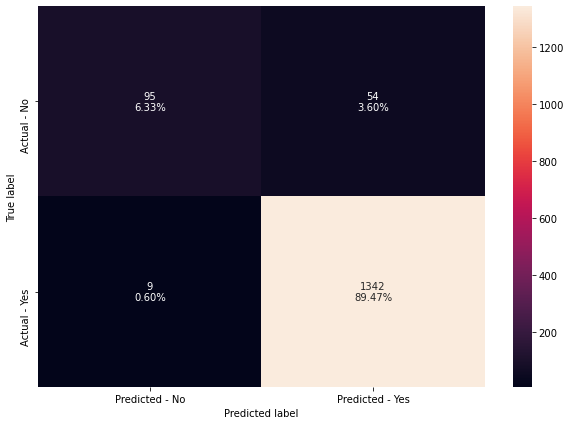

In [53]:
#confusion matrix
make_confusion_matrix(lg3,'stats',X_test3,y_test3)

# metrics
scores_LR = get_metrics_score(lg3,'stats',X_train3,X_test3,y_train3,y_test3)

In [54]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6562
Time:                        21:31:34   Log-Likelihood:                -376.62
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.044e-300
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -9.1788      0.542    -16.951      0.000     -10.240      -8.117
Income                         0.0633      0.004     16.557      0.000       0.056 

#### ROC-AUC
* ROC-AUC on training set

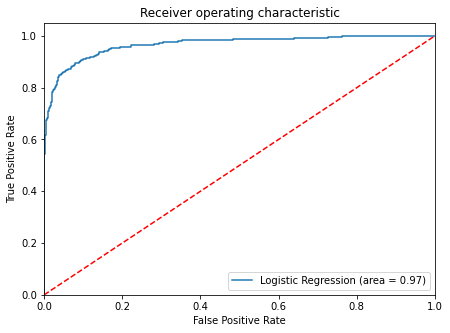

In [55]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

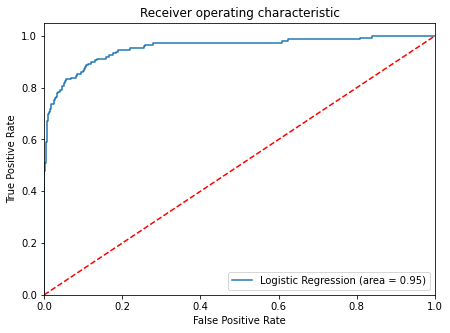

In [56]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###  Converting coefficients to odds

**Odds from coefficients**

In [57]:
odds = np.exp(lg3.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train3.columns, columns=['odds']).T # adding the odds to a dataframe

,const,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Family_Family_0f_2,Family_Family_0f_3,Family_Family_0f_4,Education_Graduate,Education_Undergrad,Region_Southern_California
odds,0.000103,1.065375,1.265891,0.339214,44.06844,0.54838,0.361287,1.055501,12.341965,5.246418,0.780616,0.014379,1.244426


**Percentage change in odds**

In [58]:
perc_change_odds = (np.exp(lg3.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train3.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,const,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Family_Family_0f_2,Family_Family_0f_3,Family_Family_0f_4,Education_Graduate,Education_Undergrad,Region_Southern_California
change_odds%,-99.989679,6.537457,26.589077,-66.078618,4306.844034,-45.16197,-63.871325,5.550101,1134.196503,424.641814,-21.93841,-98.562147,24.442613


### Coefficient interpretations

* `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a customer accepting a personal loan by 1.06 times or a 6.53% increase in odds.
* `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer accepting a personal loan 1.26 times or a 26.58% increase in the odds.
* There looks to be a trend in the family column, the higher the family size, the higher the odds of a customer accepting a personal loan
* Holding all other features constant a 1 unit change in Education will decrease the odds of a customer accepting a personal loan.

### Model Performance Improvement
* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [59]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.11250906874329347


Accuracy on training set :  0.918
Accuracy on test set :  0.918
Recall on training set :  0.8912386706948641
Recall on test set :  0.8389261744966443
Precision on training set :  0.5402930402930403
Precision on test set :  0.5580357142857143
F1 on training set :  0.6727480045610035
F1 on test set :  0.6702412868632709
ROC-AUC Score on training set :  0.906016937114551
ROC-AUC Score on test set :  0.8828235609714902


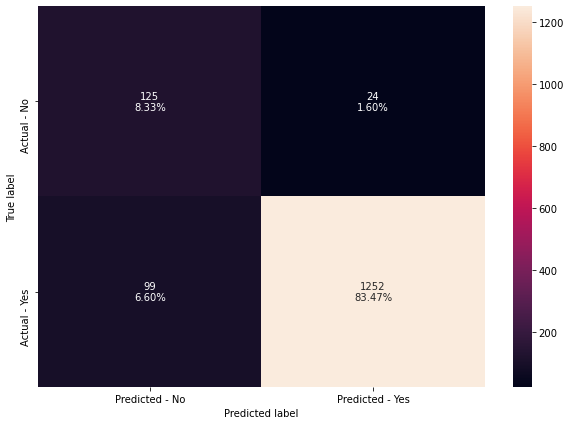

In [60]:
make_confusion_matrix(lg3,'stats',X_test3,y_test3,threshold=optimal_threshold_auc_roc)

# checking model performance
scores_LR = get_metrics_score(lg3,'stats',X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

* The model is giving a generalized performance and the recall has increased significantly.

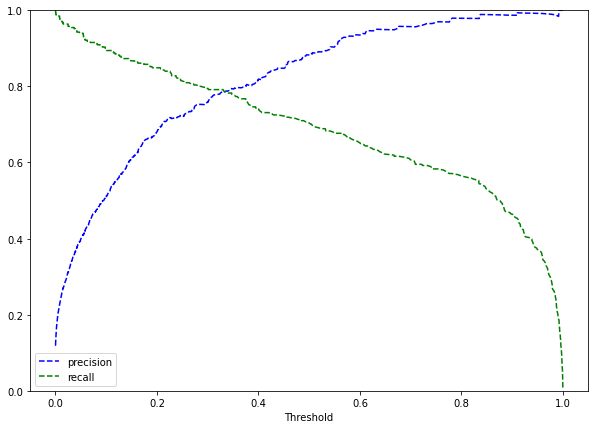

In [61]:
# Using Precision-Recall curve to see if we can find a better threshold

y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.32, we get high recall and a good precision as well.

Accuracy on training set :  0.9591428571428572
Accuracy on test set :  0.958
Recall on training set :  0.7915407854984894
Recall on test set :  0.738255033557047
Precision on training set :  0.7797619047619048
Precision on test set :  0.8208955223880597
F1 on training set :  0.7856071964017991
F1 on test set :  0.7773851590106009
ROC-AUC Score on training set :  0.8840947853021004
ROC-AUC Score on test set :  0.8602452073780794


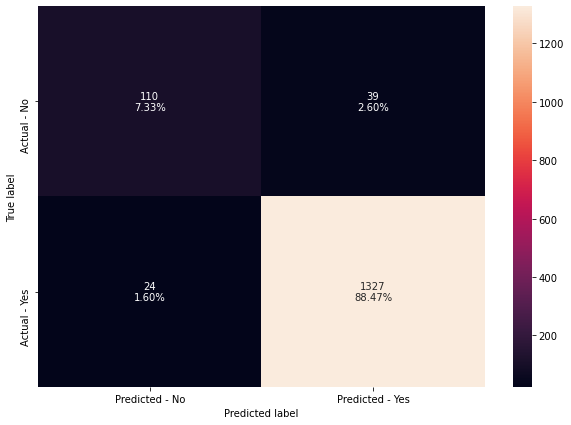

In [62]:
optimal_threshold_curve = 0.32

#confusion matrix
make_confusion_matrix(lg3,'stats',X_test3,y_test,threshold=optimal_threshold_curve)

# checking model performance
scores_LR = get_metrics_score(lg3,'stats',X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

* The model is performing well but the model with 0.11 threshold performed better.

### Model Performance Summary

In [63]:
# defining list of model
models = [lg3]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,'stats',X_train3,X_test3,y_train,y_test,flag=False)
    k = get_metrics_score(model,'stats',X_train3,X_test3,y_train3,y_test3,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,'stats',X_train3,X_test3,y_train3,y_test3,threshold=optimal_threshold_curve,flag=False)
    
    # intial logistic regression model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    # logistic regression with threshold = 0.11
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    # logistic regression with threshold = 0.32
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [64]:
LG_Comparison_Frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.11',
                                          'Logistic Regression - Optimal threshold = 0 32'],
                                          'Train_Accuracy':acc_train, 'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,'Test Recall':recall_test, 
                                          'Train Precision':precision_train, 'Test Precision':precision_test,
                                          'Train F1':f1_train,'Test F1':f1_test})
LG_Comparison_Frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.962857,0.958,0.700906,0.637584,0.882129,0.913462,0.781145,0.750988
1,Logistic Regression - Optimal threshold = 0.11,0.918000,0.918,0.891239,0.838926,0.540293,0.558036,0.672748,0.670241
2,Logistic Regression - Optimal threshold = 0 32,0.959143,0.958,0.791541,0.738255,0.779762,0.820896,0.785607,0.777385


* Model with threshold of 0.11 is performing best.

## Decision Tree 
Split Data for Decision Tree Model

In [65]:
X = df.drop("Personal_Loan", axis=1)
y = df[["Personal_Loan"]]

In [66]:
X = pd.get_dummies(X, columns=["Education", "Family", "Region"], drop_first=True)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Undergrad,Family_Family_0f_2,Family_Family_0f_3,Family_Family_0f_4,Region_Southern_California
ID,,,,,,,,,,,,,,,
1,25,1.0,49,1.6,0,1,0,0,0,0,1,0,0,1,1
2,45,19.0,34,1.5,0,1,0,0,0,0,1,0,1,0,1
3,39,15.0,11,1.0,0,0,0,0,0,0,1,0,0,0,0
4,35,9.0,100,2.7,0,0,0,0,0,1,0,0,0,0,0
5,35,8.0,45,1.0,0,0,0,0,1,1,0,0,0,1,1


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

In [68]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [69]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [70]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [71]:
def confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

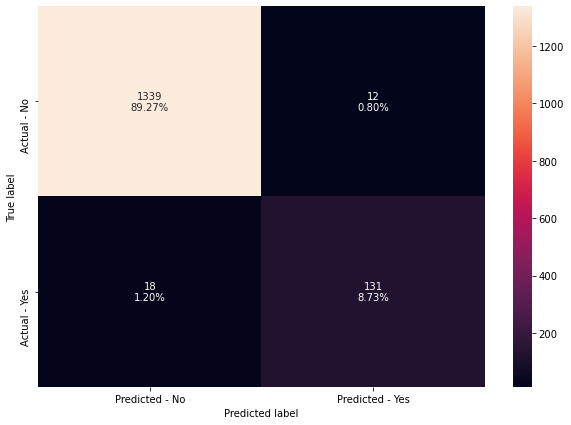

In [72]:
confusion_matrix(model,y_test)

In [73]:
y_train.value_counts(normalize=True)

Personal_Loan
0                0.905429
1                0.094571
dtype: float64

* We only have 9% of positive classes, so if our model marks each sample as negative, then we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: Bank issues personal loan.
    - Model predicted: The customer will buy the personal loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: Bank did NOT issue personal loan.
    - Model predicted: The customer will NOT buy the personal loan.
    - Outcome: The bank is unaffected.

- **False Positives:**
    - Reality: Bank did NOT issue personal loan.
    - Model predicted: The customer will buy the personal loan.
    - Outcome: The bank which is targeting potential customers will be wasting their resources on customers who will not buy the personal loan.

- **False Negatives:**
    - Reality: Bank issues personal loan.
    - Model predicted: The customer will NOT buy the personal loan.
    - Outcome: The potential customer is missed.
    
In this case, the bank wants to avoid failing to identify potential customers. Hence, recall is the right metric to check the performance of the model.

In [74]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [75]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8791946308724832


## Visualizing the Decision Tree

In [76]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Graduate', 'Education_Undergrad', 'Family_Family_0f_2', 'Family_Family_0f_3', 'Family_Family_0f_4', 'Region_Southern_California']


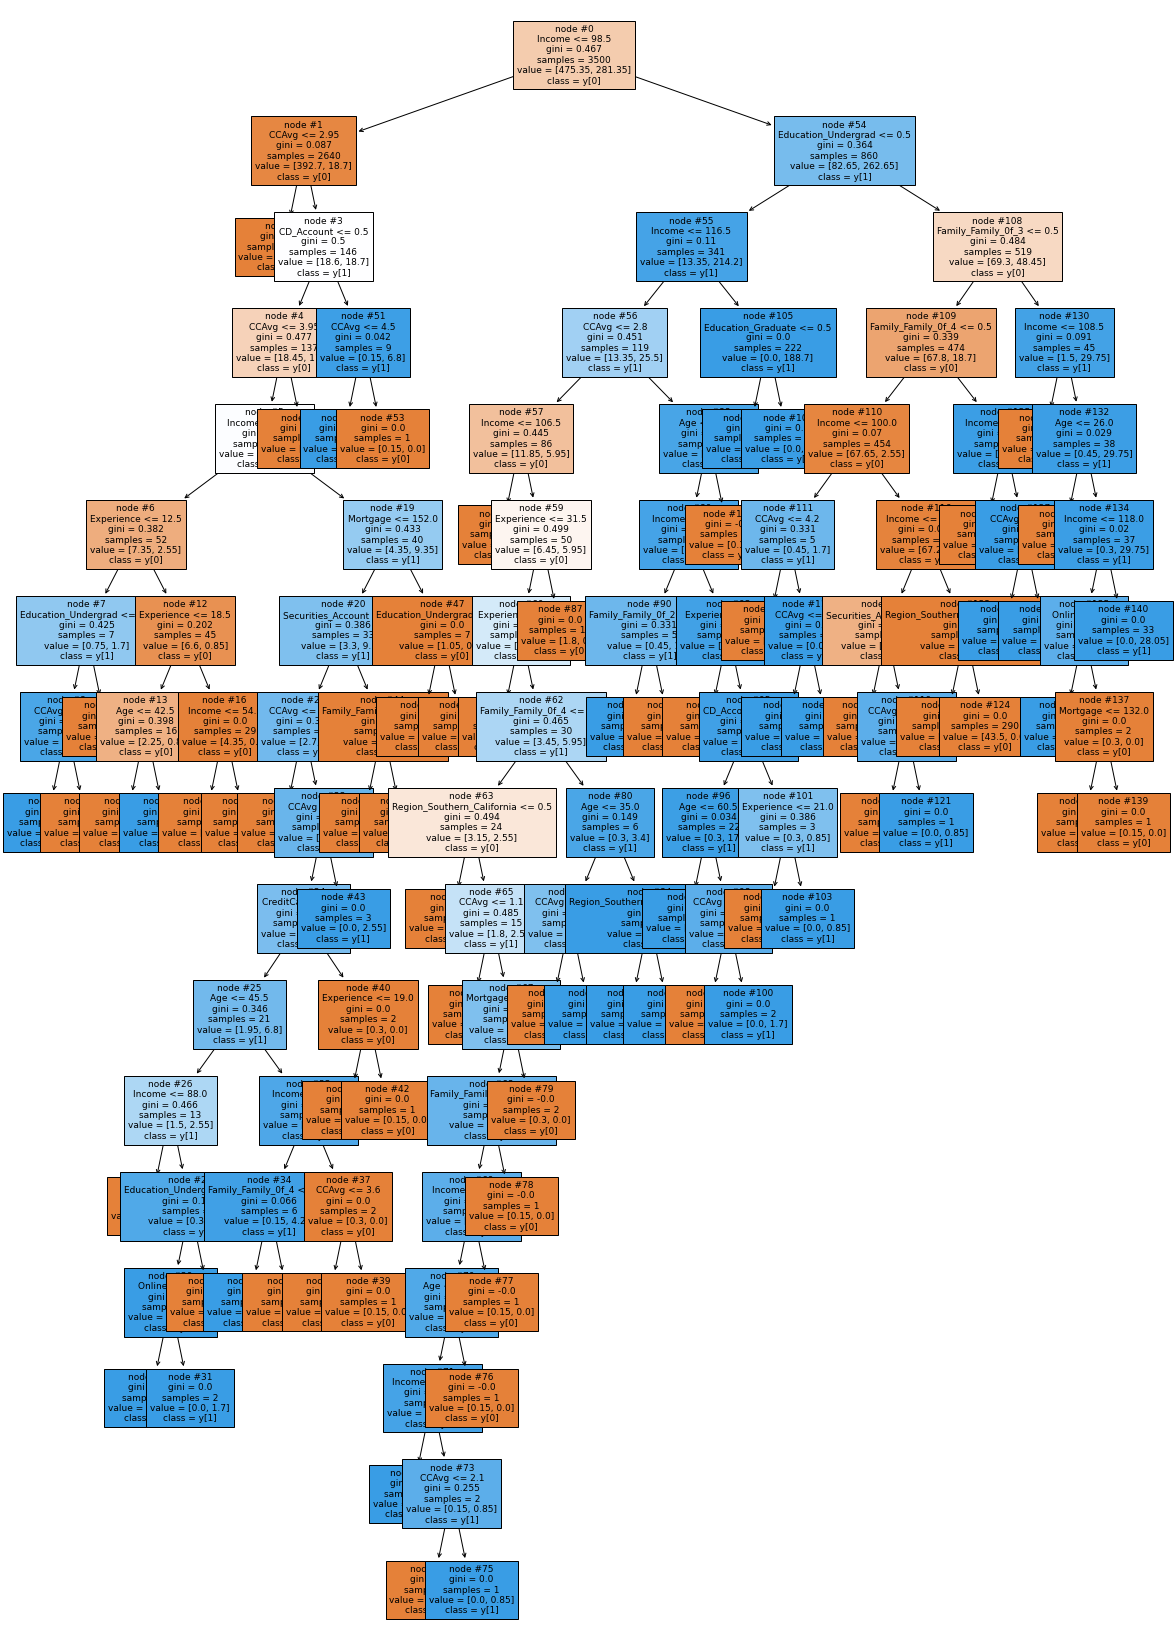

In [77]:
plt.figure(figsize=(20,30))
tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [78]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  42.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   

In [79]:
# importance of features in the tree building (Gini importance)

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Income                      5.969922e-01
Education_Undergrad         1.269477e-01
CCAvg                       8.732822e-02
Family_Family_0f_4          7.182909e-02
Family_Family_0f_3          7.090835e-02
Experience                  1.147461e-02
CD_Account                  1.136138e-02
Age                         7.979441e-03
Securities_Account          4.716203e-03
Mortgage                    4.012478e-03
Family_Family_0f_2          2.013197e-03
Region_Southern_California  2.003149e-03
Online                      1.442791e-03
CreditCard                  9.911646e-04
Education_Graduate          1.659486e-15


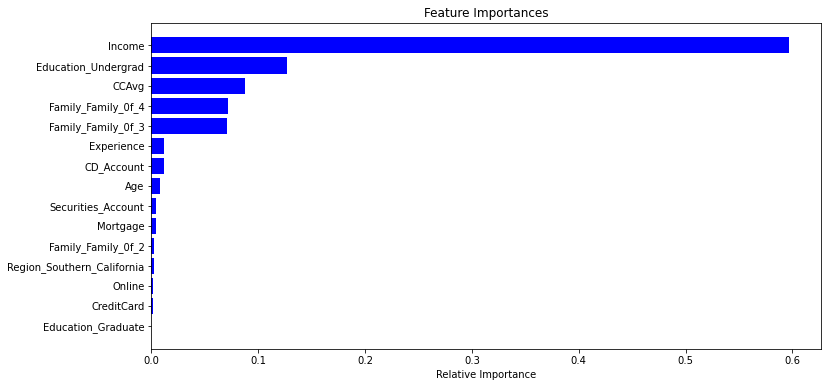

In [80]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable to identify the potential customers who have a higher probability of purchasing the loan.

## Reducing Overfitting

In [81]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=2, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

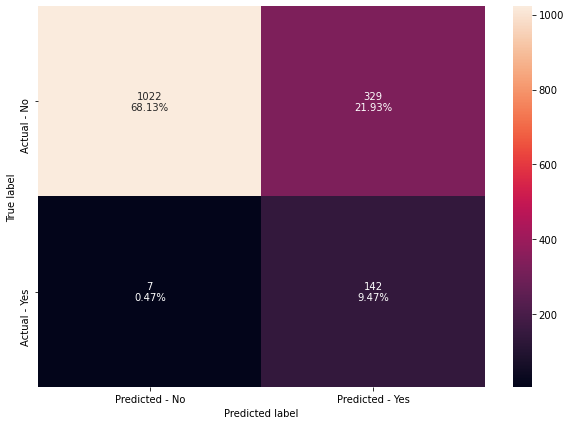

In [82]:
confusion_matrix(estimator,y_test)

In [83]:
get_recall_score(estimator)

Recall on training set :  0.9697885196374623
Recall on test set :  0.9530201342281879


## Visualizing the Decision Tree

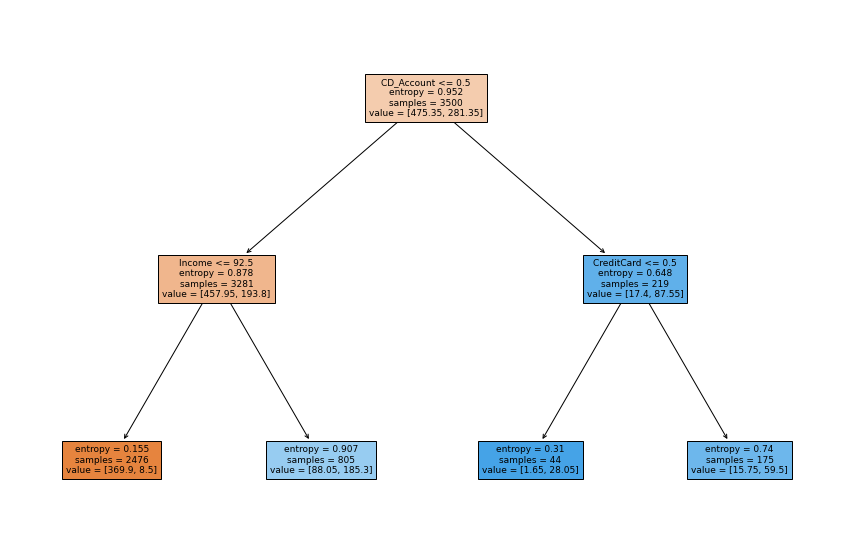

In [84]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [85]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- CD_Account <= 0.50
|   |--- Income <= 92.50
|   |   |--- weights: [369.90, 8.50] class: 0
|   |--- Income >  92.50
|   |   |--- weights: [88.05, 185.30] class: 1
|--- CD_Account >  0.50
|   |--- CreditCard <= 0.50
|   |   |--- weights: [1.65, 28.05] class: 1
|   |--- CreditCard >  0.50
|   |   |--- weights: [15.75, 59.50] class: 1



In [86]:
# importance of features in the tree building (Gini importance)

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                 Imp
Income                      0.761411
CD_Account                  0.229658
CreditCard                  0.008931
Age                         0.000000
Experience                  0.000000
CCAvg                       0.000000
Mortgage                    0.000000
Securities_Account          0.000000
Online                      0.000000
Education_Graduate          0.000000
Education_Undergrad         0.000000
Family_Family_0f_2          0.000000
Family_Family_0f_3          0.000000
Family_Family_0f_4          0.000000
Region_Southern_California  0.000000


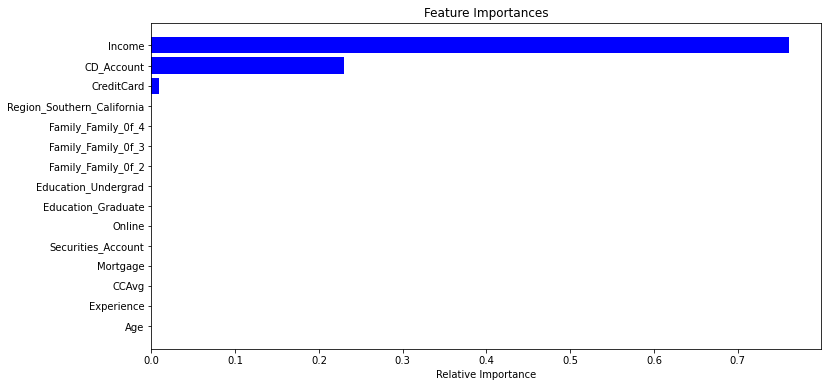

In [87]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income remains the most important variable to identify the potential customers who have a higher probability of purchasing the loan.

## Cost Complexity Pruning

#### Total impurity of leaves vs effective alphas of pruned tree

In [88]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [89]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.685883e-15
1,1.320471e-19,-1.685750e-15
2,7.482671e-19,-1.685002e-15
3,7.482671e-19,-1.684254e-15
4,7.482671e-19,-1.683506e-15
5,1.760629e-18,-1.681745e-15
6,2.332833e-18,-1.679412e-15
7,3.191139e-18,-1.676221e-15
8,4.665666e-18,-1.671555e-15
9,5.854090e-18,-1.665701e-15


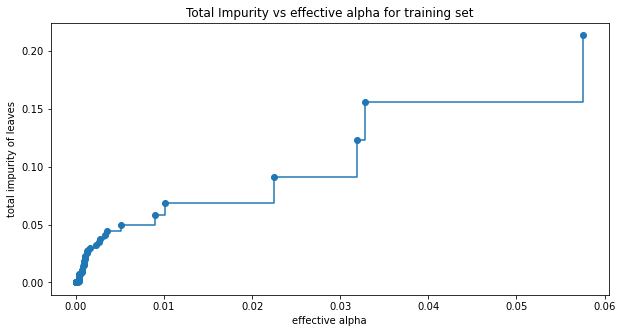

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [91]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480934


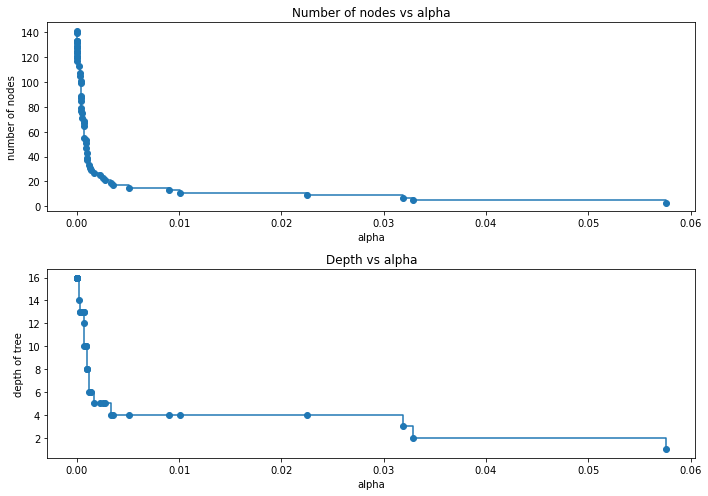

In [92]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Since accuracy isn't the right metric for our data we would want high recall

In [93]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [94]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [95]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

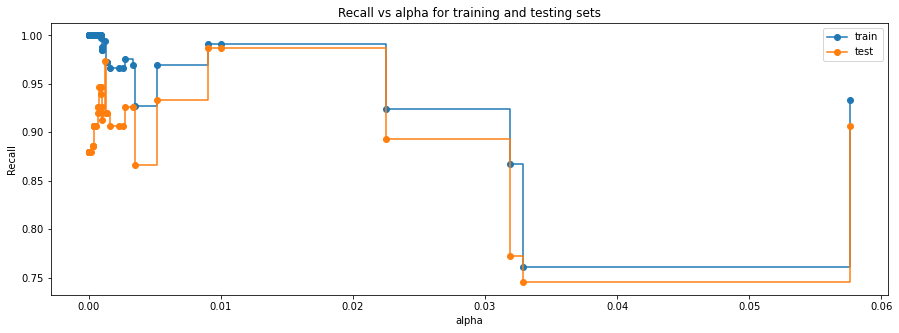

In [96]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [97]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508082,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [98]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508082,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Confusion Matrix - post-pruned decision tree

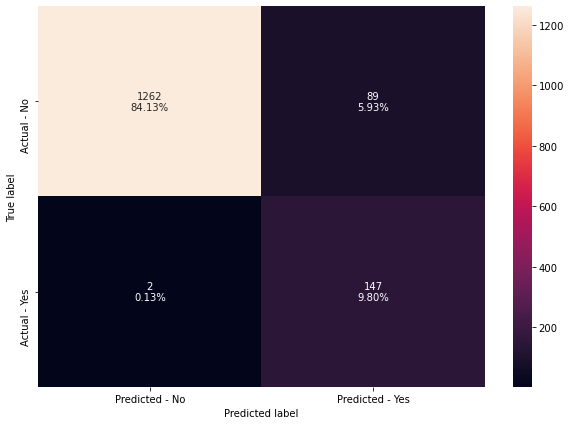

In [99]:
confusion_matrix(best_model,y_test)

In [100]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


## Visualizing the Decision Tree

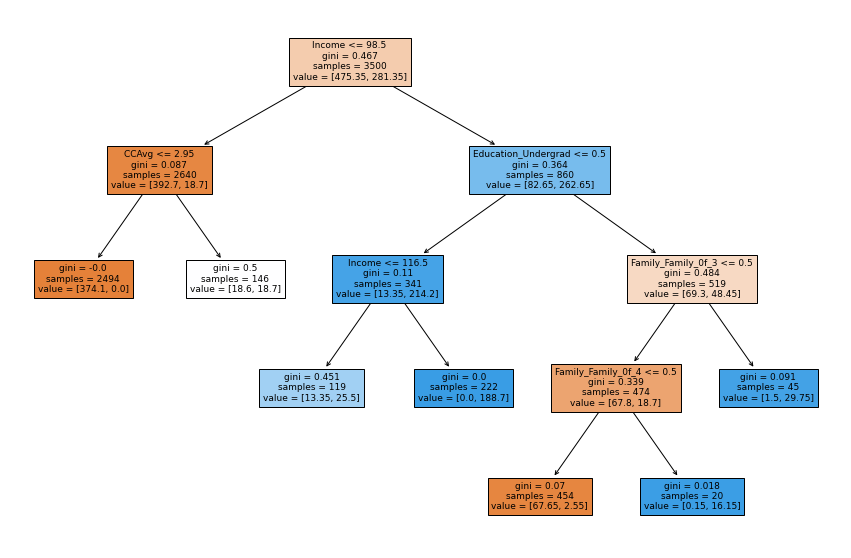

In [101]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [102]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family_Family_0f_3 <= 0.50
|   |   |   |--- Family_Family_0f_4 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Family_Family_0f_4 >  0.50
|   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |--- Family_Family_0f_3 >  0.50
|   |   |   |--- weights: [1.50, 29.75] class: 1



In [103]:
# importance of features in the tree building (Gini importance)

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Income                      0.645636
Education_Undergrad         0.140900
Family_Family_0f_3          0.080386
Family_Family_0f_4          0.077942
CCAvg                       0.055136
Age                         0.000000
Experience                  0.000000
Mortgage                    0.000000
Securities_Account          0.000000
CD_Account                  0.000000
Online                      0.000000
CreditCard                  0.000000
Education_Graduate          0.000000
Family_Family_0f_2          0.000000
Region_Southern_California  0.000000


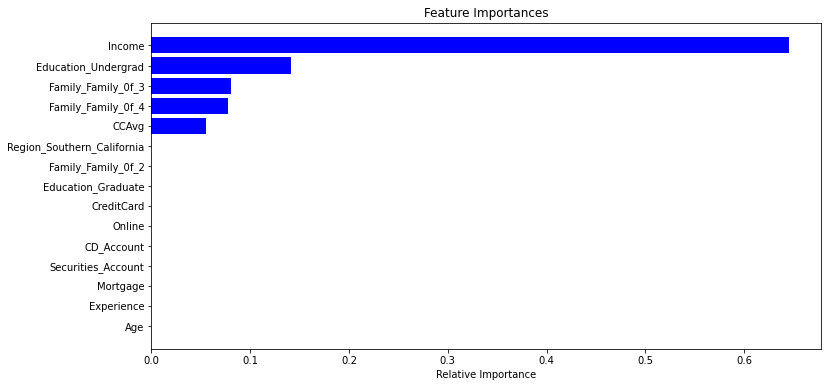

In [104]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income and Education_Undergrad are the top two important features to identify the potential customers who have a higher probability of purchasing the loan.

## Comparing all the decision tree models

In [105]:
DT_Comparison_Frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.96,0.99], 
                                 'Test_Recall':[0.87,0.95,0.98]}) 
DT_Comparison_Frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.87
1,Decision treee with hyperparameter tuning,0.96,0.95
2,Decision tree with post-pruning,0.99,0.98


**Decision tree model with post pruning has given the best recall score on the test data.**

## Comparing Logistic Regression and Decision Tree best results

In [106]:
Comparison_Frame = pd.DataFrame({'Model':['Logistic Regression - Optimal threshold = 0.11',
                                          'Decision tree with post-pruning'], 'Train_Recall':[0.89,0.99], 
                                 'Test_Recall':[0.83,0.98]}) 
Comparison_Frame

,Model,Train_Recall,Test_Recall
0,Logistic Regression - Optimal threshold = 0.11,0.89,0.83
1,Decision tree with post-pruning,0.99,0.98


* Decision tree model gave the best recall score compared to the logistic regression model

## Actual vs. Predicted

In [107]:
#Predicting on the entire dataframe and adding Prediction column to the dataframe 

df_predictions = clf.predict(X)
df['Prediction'] = df_predictions

In [108]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [109]:
df['Prediction'].value_counts()

0    3754
1    1246
Name: Prediction, dtype: int64

In [110]:
Actual_Predicted = pd.DataFrame({'Personal Loan':['Actual','Predicted'], 'Declined Loan':[4520, 3754], 
                                 'Accepted Loan':[480,1246]}) 
Actual_Predicted

,Personal Loan,Declined Loan,Accepted Loan
0,Actual,4520,480
1,Predicted,3754,1246


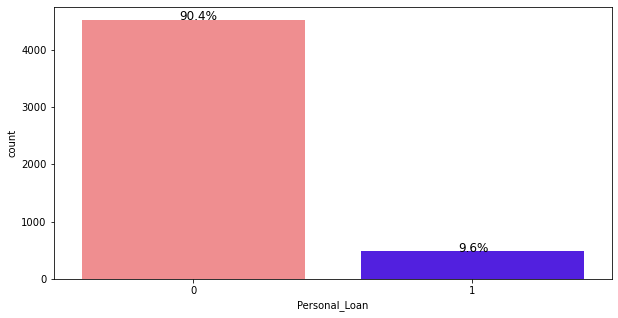

In [111]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Personal_Loan"],palette='gnuplot2_r')
perc_on_bar(ax,df["Personal_Loan"])

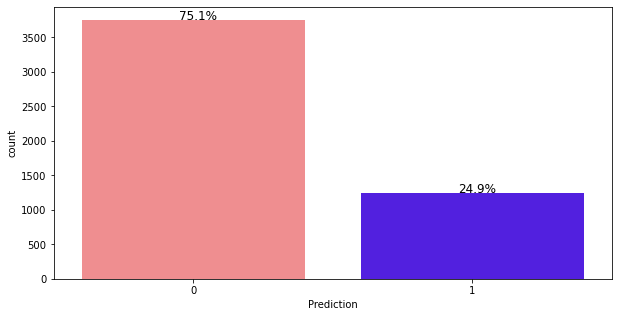

In [112]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Prediction"],palette='gnuplot2_r')
perc_on_bar(ax,df["Prediction"])

## Conclusion and Recommendations

- The data was analyzed using different techniques, used Logistic Regression and Decision Tree Classifier to build a predictive model for the same. We have been able to build a predictive model that can be used by the bank to identify the potential customers who have a higher probability of purchasing loan.
- The model was able to identify 24.9% of customers that will potentially purchase a loan compared to the 9.6% customers from the actual data.
- The bank wants to avoid failing to identify potential customers. Hence, recall is the right metric to check the performance of the model.
- Less data preparation was needed for Decision Trees and the model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Decision tree model gave the best recall score (Train=0.99, Test=0.98) compared to the logistic regression model recall score (Train=0.89, Test=0.83)
- Income and Education_Undergrad are the top two important features to identify the potential customers who have a higher probability of purchasing the loan.
- Coefficient of Income, CCAvg, CD_Account, levels of family and region are positive an increase in these will lead to increase in chances of a customer purchasing the loan.. 
- Coefficient of levels of education, online, CreditCard and Securities_Account are negative, an increase in these will lead to decrease in chances of a customer purchasing the loan.
- The analysis showed that, customers who use credit card issued by other Banks are more likely to decline the loan. The bank can advertise more lower APR on there online platform to suppress this.
- The bank should target customers with high income, have a certificate of deposit (CD) account with the bank and, have a high average spending on credit cards per month because they have higher probability of purchasing the loan.